In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import layers , models
# from tensorflow.keras import layers , models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
y_train=y_train.reshape(-1,)

In [8]:
def plot_sample(X,y ,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

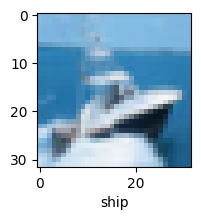

In [9]:
plot_sample(X_train,y_train,8)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),  
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


cnn.fit(X_train, y_train, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 98s 62ms/step - loss: 1.3701 - accuracy: 0.5078
Epoch 2/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.9897 - accuracy: 0.6519
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.7785 - accuracy: 0.7279
Epoch 4/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.5918 - accuracy: 0.7916
Epoch 5/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.4029 - accuracy: 0.8615
Epoch 6/10
1563/1563 [==============================] - 104s 67ms/step - loss: 0.2439 - accuracy: 0.9174
Epoch 7/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.1603 - accuracy: 0.9463
Epoch 8/10
1563/1563 [==============================] - 104s 67ms/step - loss: 0.1169 - accuracy: 0.9612
Epoch 9/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.0919 - accuracy: 0.9700
Epoch 10/10
1563/1563 [==============================] - 11

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.7822 - accuracy: 0.6847


[1.7821723222732544, 0.6847000122070312]

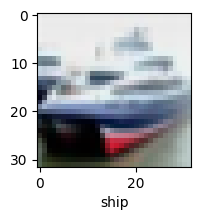

In [17]:
y_test=y_test.reshape(-1,)
plot_sample(X_test,y_test,1)

In [18]:
y_pred =cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[3.77377027e-08, 5.67817369e-06, 2.55006967e-07, 9.95789230e-01,
        1.02409933e-06, 3.98742873e-03, 2.16198314e-04, 4.22283208e-10,
        2.59229836e-07, 1.33771596e-11],
       [1.54925176e-04, 5.34947721e-05, 5.07983764e-16, 4.00464843e-16,
        4.39280882e-18, 1.22234740e-14, 1.84815000e-18, 3.56393662e-19,
        9.99791563e-01, 7.07925440e-10],
       [1.02230429e-03, 9.61907953e-02, 2.81936063e-05, 7.30726344e-04,
        1.72867676e-05, 1.06957486e-07, 7.35441148e-08, 2.49598372e-07,
        9.01823819e-01, 1.86480902e-04],
       [9.99679446e-01, 2.50022182e-12, 1.91503364e-04, 2.22869785e-05,
        1.54265678e-07, 4.12614864e-12, 1.71786244e-14, 1.21403119e-08,
        1.06654785e-04, 1.07632974e-11],
       [2.93602425e-12, 6.91500418e-06, 4.24076352e-05, 3.72377341e-03,
        9.75144565e-01, 1.22914696e-06, 2.10810974e-02, 1.35656464e-09,
        3.16782334e-09, 3.91589028e-09]], dtype=float32)

In [19]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [26]:
classes[y_classes[100]]

'deer'

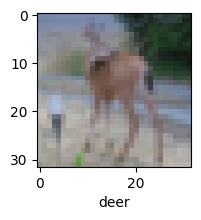

In [25]:
plot_sample(X_test,y_test,100)